###  Used cars database

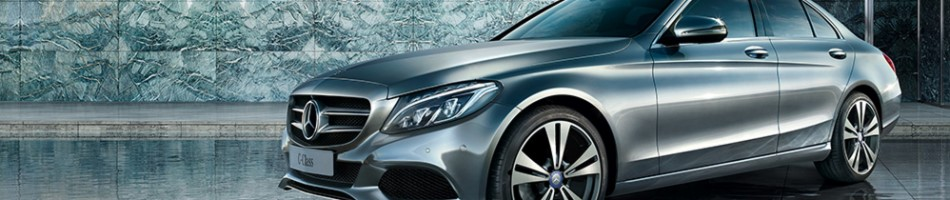

In this guided project, we'll work with a dataset of used cars from eBay Kleinanzeigen, a classifieds section of the German eBay website.

The dataset was originally scraped and uploaded to Kaggle. We've made a few modifications from the original dataset that was uploaded to [Kaggle](https://www.kaggle.com/orgesleka/used-cars-database/data)


* We sampled 50,000 data points from the full dataset, to ensure your code runs quickly 
* We dirtied the dataset a bit to more closely resemble what you would expect from a scraped dataset (the version uploaded to Kaggle was cleaned to be easier to work with)

The data dictionary provided with data is as follows:

*   dateCrawled - When this ad was first crawled. All field-values are taken from this date.
*   name - Name of the car.
*   seller - Whether the seller is private or a dealer.
*   offerType - The type of listing
*   price - The price on the ad to sell the car.
*   abtest - Whether the listing is included in an A/B test.
*   vehicleType - The vehicle Type.
*   yearOfRegistration - The year in which the car was first registered.
*   gearbox - The transmission type.
*   powerPS - The power of the car in PS.
*   model - The car model name.
*   kilometer - How many kilometers the car has driven.
*   monthOfRegistration - The month in which the car was first registered.
*   fuelType - What type of fuel the car uses.
*   brand - The brand of the car.
*   notRepairedDamage - If the car has a damage which is not yet repaired.
*   dateCreated - The date on which the eBay listing was created.
*   nrOfPictures - The number of pictures in the ad.
*   postalCode - The postal code for the location of the vehicle.
*   lastSeenOnline - When the crawler saw this ad last online.

The aim of this project is to clean the data and analyze the included used car listings. You'll also become familiar with some of the unique benefits jupyter notebook provides for pandas. 



In [1]:
# using chardet to identify the correct encoding for the file. This is a bit hard

import chardet
r_file = open(r'C:\Users\Sandra\Documents\Dataquest\autos.csv', 'rb').read()
result = chardet.detect(r_file)
charenc = result['encoding']

print (charenc) 


Windows-1252


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

In [3]:
autos = pd.read_csv(r'C:\Users\Sandra\Documents\Dataquest\autos.csv', engine='python')
#autos = pd.read_csv(r'C:\Users\Sandra\Documents\Dataquest\autos.csv', encoding='Windows-1252')

In [4]:
#save a copy
autos_cp = autos.copy()

Create a new cell with just the variable autos and run this cell.

    A neat feature of jupyter notebook is its ability to render the first few and last few values of any pandas object.
   
The same of pd.head() and pd.tails() methods


In [5]:
autos

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
5,2016-03-21 13:47:45,Chrysler_Grand_Voyager_2.8_CRD_Aut.Limited_Sto...,privat,Angebot,"$7,900",test,bus,2006,automatik,150,voyager,"150,000km",4,diesel,chrysler,NaN,2016-03-21 00:00:00,0,22962,2016-04-06 09:45:21
6,2016-03-20 17:55:21,VW_Golf_III_GT_Special_Electronic_Green_Metall...,privat,Angebot,$300,test,limousine,1995,manuell,90,golf,"150,000km",8,benzin,volkswagen,NaN,2016-03-20 00:00:00,0,31535,2016-03-23 02:48:59
7,2016-03-16 18:55:19,Golf_IV_1.9_TDI_90PS,privat,Angebot,"$1,990",control,limousine,1998,manuell,90,golf,"150,000km",12,diesel,volkswagen,nein,2016-03-16 00:00:00,0,53474,2016-04-07 03:17:32
8,2016-03-22 16:51:34,Seat_Arosa,privat,Angebot,$250,test,NaN,2000,manuell,0,arosa,"150,000km",10,NaN,seat,nein,2016-03-22 00:00:00,0,7426,2016-03-26 18:18:10
9,2016-03-16 13:47:02,Renault_Megane_Scenic_1.6e_RT_Klimaanlage,privat,Angebot,$590,control,bus,1997,manuell,90,megane,"150,000km",7,benzin,renault,nein,2016-03-16 00:00:00,0,15749,2016-04-06 10:46:35


In [6]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

This file has 50000 rows and 20 columns. The dtypes are ojects (maybe strings) and integer (int64). 
Some columns are no filled at all (all objetcs dtypes) but no more than 20%:
    * vehicletype - 44905 (5,095 missing values)
    * gearbox - 47320 (2,680 missing values)
    * model - 47242 (2,758 missing values)
    * fuelType - 45518 (4,482 missing values)
    * notRepairedDamege - 40171 (9,829 missing values)
    

    The column names use camelcase instead of Python's preferred snakecase. Let's convert the column names from camelcase to snakecase and underscore based on the data dictionary to be more descriptive.

In [7]:
def column_name(string):
    string1 = string[0]

    for i in range(1, len(string)):
        if string[i].isupper():
            string1 = string1 + '_' + string[i].lower()
        else:
            string1 = string1 + string[i]
    return string1

In [8]:
index = autos.columns
new_names = {}
for i in range(len(index)):
    new_names[index[i]] = column_name(index[i])
    
autos.rename(columns = new_names, inplace=True)
index = autos.columns
print(autos.head(3))

          date_crawled                                        name  seller  \
0  2016-03-26 17:47:46            Peugeot_807_160_NAVTECH_ON_BOARD  privat   
1  2016-04-04 13:38:56  BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik  privat   
2  2016-03-26 18:57:24                  Volkswagen_Golf_1.6_United  privat   

  offer_type   price   abtest vehicle_type  year_of_registration    gearbox  \
0    Angebot  $5,000  control          bus                  2004    manuell   
1    Angebot  $8,500  control    limousine                  1997  automatik   
2    Angebot  $8,990     test    limousine                  2009    manuell   

   power_p_s   model   odometer  month_of_registration fuel_type       brand  \
0        158  andere  150,000km                      3       lpg     peugeot   
1        286     7er  150,000km                      6    benzin         bmw   
2        102    golf   70,000km                      7    benzin  volkswagen   

  not_repaired_damage         date_created  nr_of

let's look of the file closely. Firstly, the summary

In [9]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,year_of_registration,gearbox,power_p_s,model,odometer,month_of_registration,fuel_type,brand,not_repaired_damage,date_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-21 20:37:19,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


Some columns have only 2 differents values. Let's look closely at columns seller, offer_type, gearbox, not_repaired_damege, abtest

In [10]:
autos['seller'].value_counts() 
autos['offer_type'].value_counts()
autos['gearbox'].value_counts()
autos['not_repaired_damage'].value_counts()
autos['abtest'].value_counts()
autos['vehicle_type'].value_counts()
autos['odometer'].value_counts()

privat        49999
gewerblich        1
Name: seller, dtype: int64

Angebot    49999
Gesuch         1
Name: offer_type, dtype: int64

manuell      36993
automatik    10327
Name: gearbox, dtype: int64

nein    35232
ja       4939
Name: not_repaired_damage, dtype: int64

test       25756
control    24244
Name: abtest, dtype: int64

limousine     12859
kleinwagen    10822
kombi          9127
bus            4093
cabrio         3061
coupe          2537
suv            1986
andere          420
Name: vehicle_type, dtype: int64

150,000km    32424
125,000km     5170
100,000km     2169
90,000km      1757
80,000km      1436
70,000km      1230
60,000km      1164
50,000km      1027
5,000km        967
40,000km       819
30,000km       789
20,000km       784
10,000km       264
Name: odometer, dtype: int64

* For seller: Only has 'gewerblich' = comercial and privat = private. #more than 99% are private seller
* For offer_type: Only has 'Angebot' = oferta and gesuch = petição. #more than 99% are offer
* For gearbox: three contents are available: automatic (about 21%), manual (about 74%) and null values (about 5.36%)
* For not_repaired_damage: three contents are available: yes (70%)/ no (10%)/ null (20%)
* For abtest: not clear between test and control

Other observation: 

* Price: numeric type in string ($5,000) - needs to convert from text to numeric dtypes (no null values at all)
* Odometer: numeric type in string (150,000km) - needs to convert from text to numeric dtypes (no null values at all)

The offer is higher for cars with more than 100.000km, different what occurs in Brazil.



See if the price and odometer have decimal points

In [11]:
autos.loc[autos['price'].str.contains('.', regex=False), 'price']
autos.loc[autos['odometer'].str.contains('.', regex=False), 'odometer']

Series([], Name: price, dtype: object)

Series([], Name: odometer, dtype: object)

* no decimal points in the price. Then we need to replace '$' and ',' and put into a float type
* No decimal points in the odometer. Then we need to replace 'km' and ',' and put into a float type

In [12]:
autos['price'] = autos['price'].str.replace('$', '').str.replace(',', '').astype(float)
print (autos['price'].head(1))

0    5000.0
Name: price, dtype: float64


In [13]:
autos['odometer'] = autos['odometer'].str.replace('km', '').str.replace(',', '').astype(float)
print (autos['odometer'].head())

0    150000.0
1    150000.0
2     70000.0
3     70000.0
4    150000.0
Name: odometer, dtype: float64


In [14]:
autos['odometer'].rename(column={'odometer': 'odometer_km'}, inplace=True)
print (autos.head())

0        150000.0
1        150000.0
2         70000.0
3         70000.0
4        150000.0
5        150000.0
6        150000.0
7        150000.0
8        150000.0
9        150000.0
10       150000.0
11       150000.0
12        50000.0
13       150000.0
14       150000.0
15        80000.0
16       150000.0
17       150000.0
18       150000.0
19       150000.0
20       150000.0
21       150000.0
22        10000.0
23       150000.0
24        30000.0
25       150000.0
26       125000.0
27       150000.0
28       150000.0
29       150000.0
           ...   
49970     60000.0
49971    150000.0
49972    150000.0
49973    150000.0
49974    150000.0
49975    100000.0
49976    150000.0
49977    150000.0
49978    150000.0
49979     70000.0
49980    125000.0
49981    150000.0
49982     90000.0
49983    150000.0
49984    150000.0
49985    150000.0
49986    125000.0
49987     50000.0
49988    150000.0
49989    150000.0
49990     30000.0
49991    150000.0
49992    125000.0
49993    150000.0
49994    1

          date_crawled                                               name  \
0  2016-03-26 17:47:46                   Peugeot_807_160_NAVTECH_ON_BOARD   
1  2016-04-04 13:38:56         BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik   
2  2016-03-26 18:57:24                         Volkswagen_Golf_1.6_United   
3  2016-03-12 16:58:10  Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...   
4  2016-04-01 14:38:50  Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...   

   seller offer_type   price   abtest vehicle_type  year_of_registration  \
0  privat    Angebot  5000.0  control          bus                  2004   
1  privat    Angebot  8500.0  control    limousine                  1997   
2  privat    Angebot  8990.0     test    limousine                  2009   
3  privat    Angebot  4350.0  control   kleinwagen                  2007   
4  privat    Angebot  1350.0     test        kombi                  2003   

     gearbox  power_p_s   model  odometer  month_of_registration fuel_type  \
0 

Let's continue exploring the data, specifically looking for data that doesn't look right. We'll start by analyzing the odometer_km and price columns.

In [15]:
autos['price'].unique().shape
autos['price'].describe()
#autos['price'].value_counts().head()
autos['price'].value_counts().sort_index(ascending=True).head(20)
autos['price'].value_counts().sort_index(ascending=False).head(10)

(2357,)

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

0.0     1421
1.0      156
2.0        3
3.0        1
5.0        2
8.0        1
9.0        1
10.0       7
11.0       2
12.0       3
13.0       2
14.0       1
15.0       2
17.0       3
18.0       1
20.0       4
25.0       5
29.0       1
30.0       7
35.0       1
Name: price, dtype: int64

99999999.0    1
27322222.0    1
12345678.0    3
11111111.0    2
10000000.0    1
3890000.0     1
1300000.0     1
1234566.0     1
999999.0      2
999990.0      1
Name: price, dtype: int64

There are 2357 differents values in price colum. 

There are zeros values and values less than 1000 that doesn't look right. But, Searching in the internet I find out there are some car that are free or with a very low price due "the owners give them away because it's cheaper then to take them to the scrap yard where you usually pay a fee".

Let's see the higher values. Again, searching in the internet I find out that more expensive new car is Mercedes-Benz 300 SLR - W196S - US $43,500,000 and Mercedes McLaren SLR 999 Red Gold Dream - US $10,000,000. 

Therefore, prices greather than US $10,000,000 are likely wrong. I'm going to remove them.


In [16]:
autos.loc[autos['price'] > 43500000, 'price'].value_counts().sort_index(ascending=True).head(10)
autos.loc[autos['price'].between(10000000, 43500000), 'price'].value_counts().sort_index(ascending=True).head(10)

99999999.0    1
Name: price, dtype: int64

10000000.0    1
11111111.0    2
12345678.0    3
27322222.0    1
Name: price, dtype: int64

In [17]:
autos[autos['price'] > 10000000].sort_index(ascending=True)

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,year_of_registration,gearbox,power_p_s,model,odometer,month_of_registration,fuel_type,brand,not_repaired_damage,date_created,nr_of_pictures,postal_code,last_seen
2897,2016-03-12 21:50:57,Escort_MK_1_Hundeknochen_zum_umbauen_auf_RS_2000,privat,Angebot,11111111.0,test,limousine,1973,manuell,48,escort,50000.0,3,benzin,ford,nein,2016-03-12 00:00:00,0,94469,2016-03-12 22:45:27
24384,2016-03-21 13:57:51,Schlachte_Golf_3_gt_tdi,privat,Angebot,11111111.0,test,NaN,1995,NaN,0,NaN,150000.0,0,NaN,volkswagen,NaN,2016-03-21 00:00:00,0,18519,2016-03-21 14:40:18
27371,2016-03-09 15:45:47,Fiat_Punto,privat,Angebot,12345678.0,control,NaN,2017,NaN,95,punto,150000.0,0,NaN,fiat,NaN,2016-03-09 00:00:00,0,96110,2016-03-09 15:45:47
39377,2016-03-08 23:53:51,Tausche_volvo_v40_gegen_van,privat,Angebot,12345678.0,control,NaN,2018,manuell,95,v40,150000.0,6,NaN,volvo,nein,2016-03-08 00:00:00,0,14542,2016-04-06 23:17:31
39705,2016-03-22 14:58:27,Tausch_gegen_gleichwertiges,privat,Angebot,99999999.0,control,limousine,1999,automatik,224,s_klasse,150000.0,9,benzin,mercedes_benz,NaN,2016-03-22 00:00:00,0,73525,2016-04-06 05:15:30
42221,2016-03-08 20:39:05,Leasinguebernahme,privat,Angebot,27322222.0,control,limousine,2014,manuell,163,c4,40000.0,2,diesel,citroen,NaN,2016-03-08 00:00:00,0,76532,2016-03-08 20:39:05
47598,2016-03-31 18:56:54,Opel_Vectra_B_1_6i_16V_Facelift_Tuning_Showcar...,privat,Angebot,12345678.0,control,limousine,2001,manuell,101,vectra,150000.0,3,benzin,opel,nein,2016-03-31 00:00:00,0,4356,2016-03-31 18:56:54


In [18]:
autos.drop(autos[autos['price'] > 10000000].index, axis=0, inplace=True)

#10.000.000

In [19]:
autos[autos['price'] > 4000000]

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,year_of_registration,gearbox,power_p_s,model,odometer,month_of_registration,fuel_type,brand,not_repaired_damage,date_created,nr_of_pictures,postal_code,last_seen
11137,2016-03-29 23:52:57,suche_maserati_3200_gt_Zustand_unwichtig_laufe...,privat,Angebot,10000000.0,control,coupe,1960,manuell,368,NaN,100000.0,1,benzin,sonstige_autos,nein,2016-03-29 00:00:00,0,73033,2016-04-06 21:18:11


In [20]:
# after drop some rows, we have
autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49993 entries, 0 to 49999
Data columns (total 20 columns):
date_crawled             49993 non-null object
name                     49993 non-null object
seller                   49993 non-null object
offer_type               49993 non-null object
price                    49993 non-null float64
abtest                   49993 non-null object
vehicle_type             44901 non-null object
year_of_registration     49993 non-null int64
gearbox                  47315 non-null object
power_p_s                49993 non-null int64
model                    47236 non-null object
odometer                 49993 non-null float64
month_of_registration    49993 non-null int64
fuel_type                45514 non-null object
brand                    49993 non-null object
not_repaired_damage      40168 non-null object
date_created             49993 non-null object
nr_of_pictures           49993 non-null int64
postal_code              49993 non-null int64
l

Repeating the same process for odometer

In [21]:
autos['odometer'].unique().shape
autos['odometer'].describe()
#autos['price'].value_counts().head()
autos['odometer'].value_counts().sort_index(ascending=True).head(20)
autos['odometer'].value_counts().sort_index(ascending=False).head(10)

(13,)

count     49993.000000
mean     125733.502690
std       40041.011155
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer, dtype: float64

5000.0        967
10000.0       264
20000.0       784
30000.0       789
40000.0       818
50000.0      1026
60000.0      1164
70000.0      1230
80000.0      1436
90000.0      1757
100000.0     2169
125000.0     5170
150000.0    32419
Name: odometer, dtype: int64

150000.0    32419
125000.0     5170
100000.0     2169
90000.0      1757
80000.0      1436
70000.0      1230
60000.0      1164
50000.0      1026
40000.0       818
30000.0       789
Name: odometer, dtype: int64

For odometer, the information maybe OK. Now we have 49993 rows in the autos file

Let's now move on to the date columns and understand the date range the data covers.

There are 5 columns that should represent date values. Some of these columns were created by the crawler, some came from the website itself. We can differentiate by referring to the data dictionary:
 - date_crawled`: added by the crawler
 - date_created`: from the website
 - registration_month`: from the website
 - registration_year`: from the website

Right now, the date_crawled, last_seen, and date_created columns are all identified as string values by pandas. Because these three columns are represented as strings, we need to convert the data into a numerical representation so we can understand it quantitatively. The other two columns are represented as numeric values

In [22]:
autos[['date_crawled','date_created','last_seen']][0:5]  # mesmo resultado de head()

,date_crawled,date_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


In [23]:
#date_crawled = autos['date_crawled'].copy()
#date_crawled.head()


In [24]:
#date_crawled = pd.to_datetime(date_crawled)
#print (date_crawled.head())
#date_crawled.value_counts()

#in this way we have the date with timestamp format. But hour results itself a bit cucumber then let's only with date.


 ## Information regarding dates
 To see the distribuition curve maybe interesting to put it in a histogram.
 
 
 ## Info to Date crawled
Bellow is possible to see the quantity of post by date crawled, classified from date with higher number posts to 
date with fewest posts.
* This date_crawled is for one month only and maybe for the last date is not correct (or this is a outlier)
* The higher is 2016-04-03 with 1934 posts (correspoding a 3,87% of the total posts) 
* The fewest is 2016-04-07 with 71 posts (correspoding a 0,14% of the total posts) 
* The range is from 2016-03-05 to 2016-04-07



In [77]:
def see_date(column_name):
    date_pass = pd.to_datetime(autos[column_name].str[0:10]) 
    date_hpost = date_pass.value_counts(dropna=False).head(1)
    date_fpost = date_pass.value_counts(dropna=False).tail(1)

    date_hpost_mean = date_pass.value_counts(normalize=True, dropna=False).head(1)[0]*100
    date_fpost_mean = date_pass.value_counts(normalize=True, dropna=False).tail(1)[0]*100
    
    date_start = date_pass.value_counts(dropna=False).sort_index(ascending=True).head(1)
    date_end = date_pass.value_counts(dropna=False).sort_index(ascending=True).tail(1)

    return date_hpost, date_fpost, date_hpost_mean, date_fpost_mean, date_start, date_end

In [79]:
print (see_date('date_crawled'))

(2016-04-03    1934
Name: date_crawled, dtype: int64, 2016-04-07    71
Name: date_crawled, dtype: int64, 3.868541595823415, 0.1420198827835897, 2016-03-05    1269
Name: date_crawled, dtype: int64, 2016-04-07    71
Name: date_crawled, dtype: int64)


## Info to date seen
Bellow is possible to see the quantity of post by date seen, classified from date with higher number posts to 
date with fewest posts.

This date_seen is for one month only and maybe for the last date is not correct (or this is a outlier)

* The higher is 2016-04-06 with 11048 posts (correspoding a 22,1% of the total posts) 
* The fewest is 2016-03-05 with 54 posts (correspoding a 0,11% of the total posts) 
* The range is from 2016-03-05 to 2016-04-07


In [80]:
print (see_date('last_seen'))

(2016-04-06    11048
Name: last_seen, dtype: int64, 2016-03-05    54
Name: last_seen, dtype: int64, 22.099093873142237, 0.10801512211709641, 2016-03-05    54
Name: last_seen, dtype: int64, 2016-04-07    6546
Name: last_seen, dtype: int64)


## Info to date created
Bellow is possible to see the quantity of post by date created, classified from date with higher number posts to 
date with fewest posts.

* The higher is 2016-04-03 with 1946 posts created (correspoding a 3,891% of the total posts) 
* The fewest is 2015_12_30 with 1 posts (correspoding a 0,02% of the total posts) 
* The range is from 2015-06-11 to 2016-04-07


In [82]:
print (see_date('date_created'))

(2016-04-03    1946
Name: date_created, dtype: int64, 2015-12-30    1
Name: date_created, dtype: int64, 3.8925449562938814, 0.002000280039205489, 2015-06-11    1
Name: date_created, dtype: int64, 2016-04-07    64
Name: date_created, dtype: int64)


# Info to month of registration

Maybe has no correct values due month = 0. I'm going to desconsiderate the month equal zero.
To see this distribuition curve could use the bar chart due a low densitive (only 12 month)

* The higher is march with 5069 posts created  
* The fewest is febreary with 3007 posts  
* The range is from january to december  


In [126]:
#autos.loc[autos['month_of_registration'] > 0, 'month_of_registration'].value_counts(dropna=False).sort_index(ascending=True)

1     3282
2     3007
3     5069
4     4102
5     4107
6     4367
7     3949
8     3191
9     3388
10    3651
11    3360
12    3447
Name: month_of_registration, dtype: int64

In [127]:
autos.loc[autos['month_of_registration'] > 0, 'month_of_registration'].describe()
month = autos.loc[autos['month_of_registration'] > 0, 'month_of_registration']
month.value_counts(dropna=False)
month.value_counts(dropna=False).sort_index(ascending=True)

count    44920.000000
mean         6.370102
std          3.349184
min          1.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         12.000000
Name: month_of_registration, dtype: float64

3     5069
6     4367
5     4107
4     4102
7     3949
10    3651
12    3447
9     3388
11    3360
1     3282
8     3191
2     3007
Name: month_of_registration, dtype: int64

1     3282
2     3007
3     5069
4     4102
5     4107
6     4367
7     3949
8     3191
9     3388
10    3651
11    3360
12    3447
Name: month_of_registration, dtype: int64

## Info Year of registration

In [129]:
autos['year_of_registration'].describe()

count    49993.000000
mean      2005.073650
std        105.720065
min       1000.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       9999.000000
Name: year_of_registration, dtype: float64

One thing that stands out from the exploration we did is that the registration_year column contains some odd values:

    The minimum value is 1000, before cars were invented
    The maximum value is 9999, many years into the future

Because a car can't be first registered after the listing was seen, any vehicle with a registration year above 2016 (date of file extraction) definitely inaccurate. Determining the earliest valid year is more difficult. Realistically, it could be somewhere in the first few decades of the 1900s.

Let's count the number of listings with cars that fall outside the 1900 - 2016 interval and see if it's safe to remove those rows entirely, or if we need more custom logic.

Bellow, we could see that the year that has more offer is from 1998 to 2007!

In [149]:
autos[autos.year_of_registration < 1900].shape
autos[autos.year_of_registration > 2016].shape
autos[(autos.year_of_registration < 1900) | (autos.year_of_registration > 2016)].shape

(6, 20)

(1964, 20)

(1970, 20)

We have around 4% of the data with odd values (out of range the date considered). Let's drop this

In [173]:
# df.drop(df[(df.score < 50) & (df.score > 20)].index, inplace=True)
autos.drop(autos[(autos.year_of_registration < 1900) | (autos.year_of_registration > 2016)].index, inplace=True)

In [175]:
autos['year_of_registration'].describe()

count    48023.000000
mean      2002.804177
std          7.309675
min       1910.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       2016.000000
Name: year_of_registration, dtype: float64

In [181]:
autos.year_of_registration.value_counts()[:10]


2000    3354
2005    3015
1999    2999
2004    2737
2003    2727
2006    2708
2001    2702
2002    2533
1998    2453
2007    2304
Name: year_of_registration, dtype: int64

   ## Info to Brand

In [311]:
brand_uq = autos.brand.unique()
brand_qt = autos.brand.value_counts()
brand_pb = autos.brand.value_counts(normalize=True)*100



['peugeot' 'bmw' 'volkswagen' 'smart' 'ford' 'chrysler' 'seat' 'renault'
 'mercedes_benz' 'audi' 'sonstige_autos' 'opel' 'mazda' 'porsche' 'mini'
 'toyota' 'dacia' 'nissan' 'jeep' 'saab' 'volvo' 'mitsubishi' 'jaguar'
 'fiat' 'skoda' 'subaru' 'kia' 'citroen' 'chevrolet' 'hyundai' 'honda'
 'daewoo' 'suzuki' 'trabant' 'land_rover' 'alfa_romeo' 'lada' 'rover'
 'daihatsu' 'lancia']


In [303]:
autos.loc[autos.brand == 'peugeot', 'price'].mean()
autos.loc[(autos.brand == 'peugeot') & (autos.price > 0), 'price'].min()
autos.loc[(autos.brand == 'peugeot') & (autos.price > 0), 'price'].max()
autos.loc[(autos.brand == 'peugeot') & (autos.price > 0), 'price'].mean()




3039.4682651622

1.0

25500.0

3094.0172290021537

In [310]:
brand_dict = {}

for brand in autos.brand.unique():
    brand_dict[brand] = [brand_qt[brand], brand_pb[brand]]
    brand_dict[brand].append(autos.loc[autos.brand == brand, 'price'].min())
    brand_dict[brand].append(autos.loc[autos.brand == brand, 'price'].max())    
    brand_dict[brand].append(autos.loc[autos.brand == brand, 'price'].mean())  
    brand_dict[brand].append(autos.loc[autos.brand == brand, 'odometer'].max())  
    brand_dict[brand].append(autos.loc[autos.brand == brand, 'odometer'].min()) 
    brand_dict[brand].append(autos.loc[autos.brand == brand, 'odometer'].mean())  
    brand_dict[brand].append(autos.loc[autos.brand == brand, 'year_of_registration'].min())  
    brand_dict[brand].append(autos.loc[autos.brand == brand, 'year_of_registration'].max())  
    
print (brand_dict)

{'peugeot': [1418, 2.9527518064260874, 0.0, 25500.0, 3039.4682651622, 150000.0, 5000.0, 127136.81241184767, 1964, 2016], 'bmw': [5284, 11.003061033254898, 0.0, 1234566.0, 8334.645155185466, 150000.0, 5000.0, 132434.70855412565, 1929, 2016], 'volkswagen': [10187, 21.212752222893197, 0.0, 999999.0, 5426.382546382644, 150000.0, 5000.0, 128728.28114263277, 1943, 2016], 'smart': [668, 1.3910001457634884, 0.0, 16850.0, 3542.706586826347, 150000.0, 5000.0, 99595.80838323354, 1992, 2016], 'ford': [3351, 6.977906419840493, 0.0, 999999.0, 3949.42345568487, 150000.0, 5000.0, 124068.93464637421, 1927, 2016], 'chrysler': [176, 0.3664910563688233, 0.0, 20000.0, 3229.443181818182, 150000.0, 5000.0, 133181.81818181818, 1966, 2016], 'seat': [873, 1.8178789330112652, 0.0, 33500.0, 4296.492554410081, 150000.0, 5000.0, 121563.57388316152, 1950, 2016], 'renault': [2274, 4.735231035129001, 0.0, 93000.0, 2395.4164467897976, 150000.0, 5000.0, 128183.81706244503, 1910, 2016], 'mercedes_benz': [4579, 9.53501447

I think that in this dict has a lot of information, for each brand has:
    * quantity of offers
    * % of offers of this brand
    * price minimum
    * price maximum
    * price mean
    * odometer minimum
    * odometer maximum
    * odometer mean
    * year started
    * year finished
    
And if change from dict to dataframe is possible to classify as you prefer.

But I think that to perform this brand by brand is hard. Maybe using other logic behind this.

In [385]:
brand = pd.DataFrame.from_dict(brand_dict, orient='index', columns=['offers', 'offer_mean', 'less_price', 'high_price', 'price_mean', 
                                                               'less_km', 'high_km', 'km_mean', 'year_start', 'year_end'])

brand.head(10)


,offers,offer_mean,less_price,high_price,price_mean,less_km,high_km,km_mean,year_start,year_end
peugeot,1418,2.952752,0.0,25500.0,3039.468265,150000.0,5000.0,127136.812412,1964,2016
bmw,5284,11.003061,0.0,1234566.0,8334.645155,150000.0,5000.0,132434.708554,1929,2016
volkswagen,10187,21.212752,0.0,999999.0,5426.382546,150000.0,5000.0,128728.281143,1943,2016
smart,668,1.391000,0.0,16850.0,3542.706587,150000.0,5000.0,99595.808383,1992,2016
ford,3351,6.977906,0.0,999999.0,3949.423456,150000.0,5000.0,124068.934646,1927,2016
chrysler,176,0.366491,0.0,20000.0,3229.443182,150000.0,5000.0,133181.818182,1966,2016
seat,873,1.817879,0.0,33500.0,4296.492554,150000.0,5000.0,121563.573883,1950,2016
renault,2274,4.735231,0.0,93000.0,2395.416447,150000.0,5000.0,128183.817062,1910,2016
mercedes_benz,4579,9.535014,0.0,180000.0,8485.239572,150000.0,5000.0,130856.082114,1937,2016
audi,4149,8.639610,0.0,175000.0,9093.650036,150000.0,5000.0,129287.780188,1968,2016


### Using this dataframe is possible answer the question:
* what brand more and less offer
* what brand has more and less expensive price
* what brand has older offer
* what brand has young offer

In [383]:
print ('High offer')
brand.loc[brand.offers == brand.offers.max()]

print ('Less offer')
brand.loc[brand.offers == brand.offers.min()]

print ('High Price')
brand.loc[brand.high_price == brand.high_price.max()]

print ('Less Price')
brand.loc[brand.offers == brand.offers.max()]


High offer


,offers,offer_mean,less_price,high_price,price_mean,less_km,high_km,km_mean,year_start,year_end
volkswagen,10187,21.212752,0.0,999999.0,5426.382546,150000.0,5000.0,128728.281143,1943,2016


Less offer


,offers,offer_mean,less_price,high_price,price_mean,less_km,high_km,km_mean,year_start,year_end
lada,29,0.060388,0.0,6500.0,2502.896552,150000.0,5000.0,85517.241379,1976,2011


High Price


,offers,offer_mean,less_price,high_price,price_mean,less_km,high_km,km_mean,year_start,year_end
sonstige_autos,526,1.095308,0.0,10000000.0,39621.779468,150000.0,5000.0,87262.357414,1910,2016


Less Price


,offers,offer_mean,less_price,high_price,price_mean,less_km,high_km,km_mean,year_start,year_end
volkswagen,10187,21.212752,0.0,999999.0,5426.382546,150000.0,5000.0,128728.281143,1943,2016
